## Initial imports

In [1]:
from scm.plams import *
from ase.build import bulk as ase_build_bulk
import matplotlib.pyplot as plt
import numpy as np

# this line is not required in AMS2025+
init()

PLAMS working folder: /path/plams/examples/BandStructure/plams_workdir


## Metal band structure relative to Fermi energy

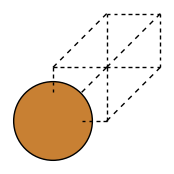

In [2]:
Cu = fromASE(ase_build_bulk("Cu", "fcc", a=3.6))  # primitive cell
plot_molecule(Cu);

In [3]:
s = Settings()
s.input.ams.Task = "SinglePoint"
s.input.DFTB.Periodic.BandStructure.Enabled = "Yes"
s.input.DFTB.Model = "SCC-DFTB"
s.input.DFTB.ResourcesDir = "DFTB.org/matsci-0-3"
s.runscript.nproc = 1

In [4]:
job = AMSJob(settings=s, name="Cu", molecule=Cu)
job.run();

[10.02|14:57:41] JOB Cu STARTED
[10.02|14:57:41] JOB Cu RUNNING
[10.02|14:57:46] JOB Cu FINISHED
[10.02|14:57:46] JOB Cu SUCCESSFUL


In [5]:
def check_ams_version():
    try:
        from scm.plams import __version__

        return __version__ >= "2024.2"
    except ImportError:
        return False


is_ams_2025_or_higher = check_ams_version()

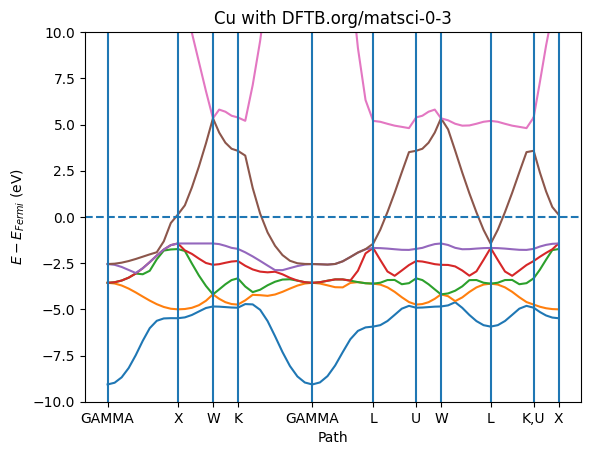

In [6]:
if is_ams_2025_or_higher:
    # get_band_structure returns an axis in AMS2025+
    x, y_spin_up, y_spin_down, labels, fermi_energy = job.results.get_band_structure(unit="eV")
    ax = plot_band_structure(x, y_spin_up, None, labels, fermi_energy, zero="fermi")
    ax.set_ylim(-10, 10)
    ax.set_ylabel("$E - E_{Fermi}$ (eV)")
    ax.set_xlabel("Path")
    ax.set_title("Cu with DFTB.org/matsci-0-3")
    plt.show()
else:
    x, y_spin_up, y_spin_down, labels, fermi_energy = job.results.get_band_structure(unit="eV")
    plot_band_structure(x, y_spin_up, None, labels, fermi_energy, zero="fermi")
    plt.ylim(-10, 10)
    plt.ylabel("$E - E_{Fermi}$ (eV)")
    plt.xlabel("Path")
    plt.title("Cu with DFTB.org/matsci-0-3")
    plt.show()

## Semiconductor band structure relative to VBM

For a semiconductor like ZnO you can also choose to put the zero at the VBM ('vbm') or CBM ('cbm')

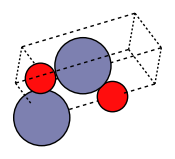

In [7]:
ZnO = fromASE(ase_build_bulk("ZnO", "wurtzite", a=3.2, c=5.3, u=0.375))
plot_molecule(ZnO, rotation=("60x,60y,80z"));

In [8]:
s = Settings()
s.input.ams.Task = "SinglePoint"
s.input.DFTB.Periodic.BandStructure.Enabled = "Yes"
s.input.DFTB.Model = "GFN1-xTB"
s.runscript.nproc = 1
job = AMSJob(settings=s, molecule=ZnO, name="ZnO")
job.run();

[10.02|14:57:46] JOB ZnO STARTED
[10.02|14:57:46] JOB ZnO RUNNING
[10.02|14:57:48] JOB ZnO FINISHED
[10.02|14:57:48] JOB ZnO SUCCESSFUL


The below call to ``plot_band_structure`` plots both the spin up and spin down. The spin-down bands are plotted as dashed lines. Note that in this case there is no spin polarization so the spin-down bands perfectly overlap the spin-up bands.

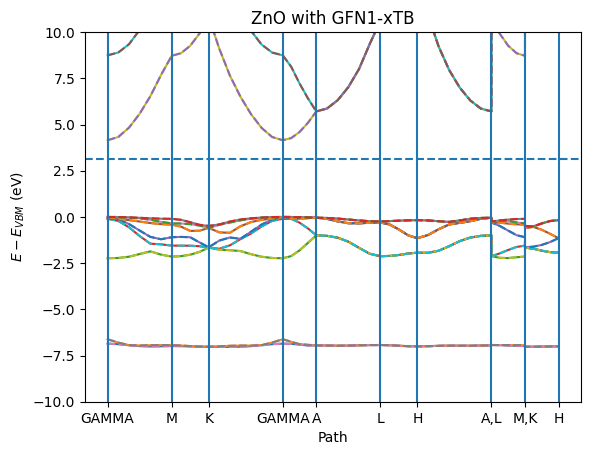

In [9]:
if is_ams_2025_or_higher:
    # get_band_structure returns an axis in AMS2025+
    ax = plot_band_structure(*job.results.get_band_structure(unit="eV"), zero="vbmax")
    ax.set_ylim(-10, 10)
    ax.set_ylabel("$E - E_{VBM}$ (eV)")
    ax.set_xlabel("Path")
    ax.set_title("ZnO with GFN1-xTB")
    plt.show()
else:
    plot_band_structure(*job.results.get_band_structure(unit="eV"), zero="vbmax")
    plt.ylim(-10, 10)
    plt.ylabel("$E - E_{VBM}$ (eV)")
    plt.xlabel("Path")
    plt.title("ZnO with GFN1-xTB")
    plt.show()

## Spin-up and spin-down band structures
If you perform a spin-polarized calculation you get both spin-up and spin-down bands. Below a spin-polarized DFT+U calculation on NiO is performed together with the BAND engine.

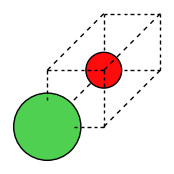

In [10]:
d = 2.085
mol = Molecule()
mol.add_atom(Atom(symbol="Ni", coords=(0, 0, 0)))
mol.add_atom(Atom(symbol="O", coords=(d, d, d)))
mol.lattice = [[0.0, d, d], [d, 0.0, d], [d, d, 0.0]]
plot_molecule(mol);

In [11]:
s = Settings()
s.input.ams.task = "SinglePoint"
s.input.band.Unrestricted = "yes"
s.input.band.XC.GGA = "BP86"
s.input.band.Basis.Type = "DZ"
s.input.band.NumericalQuality = "Basic"
s.input.band.HubbardU.Enabled = "Yes"
s.input.band.HubbardU.UValue = "0.6 0.0"
s.input.band.HubbardU.LValue = "2 -1"
s.input.band.BandStructure.Enabled = "Yes"

job = AMSJob(settings=s, molecule=mol, name="NiO")
job.run();

[10.02|14:57:49] JOB NiO STARTED
[10.02|14:57:49] JOB NiO RUNNING
[10.02|14:58:33] JOB NiO FINISHED
[10.02|14:58:33] JOB NiO SUCCESSFUL


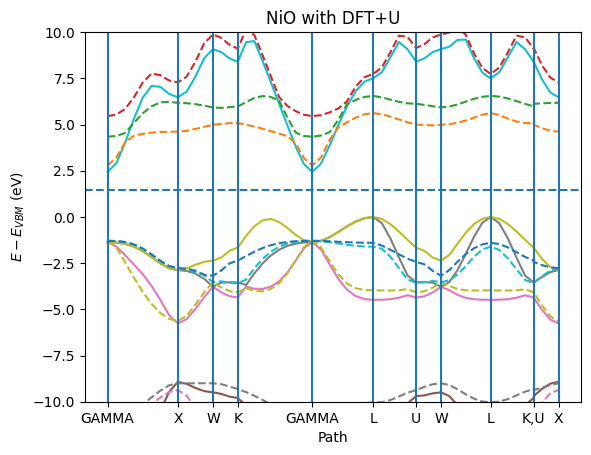

In [12]:
if is_ams_2025_or_higher:
    # get_band_structure returns an axis in AMS2025+
    ax = plot_band_structure(*job.results.get_band_structure(unit="eV"), zero="vbmax")
    ax.set_ylim(-10, 10)
    ax.set_ylabel("$E - E_{VBM}$ (eV)")
    ax.set_xlabel("Path")
    ax.set_title("NiO with DFT+U")
    plt.show()
else:
    plot_band_structure(*job.results.get_band_structure(unit="eV"), zero="vbmax")
    plt.ylim(-10, 10)
    plt.ylabel("$E - E_{VBM}$ (eV)")
    plt.xlabel("Path")
    plt.title("NiO with DFT+U")
    plt.show()